<a href="https://colab.research.google.com/github/LeonardoSanBenitez/Unlearn-Saliency/blob/master/PEM_composition_img_gen/01_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%cd /content
!pip install python-dotenv
import dotenv
dotenv.load_dotenv()

import os
assert (os.getenv("HF_TOKEN") is not None) and (len(os.getenv("HF_TOKEN"))>0)

/content


In [4]:
!git clone https://github.com/huggingface/diffusers
%cd diffusers
!pip install .

Cloning into 'diffusers'...
remote: Enumerating objects: 81822, done.
remote: Counting objects: 100% (369/369), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 81822 (delta 286), reused 159 (delta 158), pack-reused 81453 (from 4)
Receiving objects: 100% (81822/81822), 59.76 MiB | 12.70 MiB/s, done.
Resolving deltas: 100% (59904/59904), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3335899 sha256=fa4da2ad673b46de71ca1c9ae1c276dcc1f98d3ca44e63c79ccb5305f7655036
  Stored in directory: /tmp/pip-ephem-wheel-cache-pjp74io7/wheels/30/15/ca/ab6e88c89d6ba7047b3f155894c6c346e7cf06067fd132ae62
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.2
    Uninstalling diffusers-0.32.2:
      Succe

In [5]:
%cd examples/text_to_image
!pip install -r requirements.txt

/content/diffusers/examples/text_to_image
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 39.7 MB/s eta 0:00:0

In [6]:
!huggingface-cli login --token ${HF_TOKEN}

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `capivara-explainer` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [7]:
!accelerate config default

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [8]:
import datasets
from PIL import Image
import matplotlib.pyplot as plt
import random
from diffusers import AutoPipelineForText2Image
import torch
import matplotlib.pyplot as plt
from typing import List
import numpy as np


os.environ["DATASET_NAME"]="lambdalabs/naruto-blip-captions"
os.environ["MODEL_NAME"]="stable-diffusion-v1-5/stable-diffusion-v1-5"
os.environ["OUTPUT_DIR"]="./assets/lora/naruto"  # Local output
os.environ["HUB_MODEL_ID"]="LeonardoBenitez/sd-lora-naruto"  # Remote output, https://huggingface.co/LeonardoBenitez/sd-lora-naruto

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json:   0%|          | 0.00/897 [00:00<?, ?B/s]

(…)-00000-of-00002-12944970063701d5.parquet:   0%|          | 0.00/344M [00:00<?, ?B/s]

(…)-00001-of-00002-cefa2f480689f147.parquet:   0%|          | 0.00/357M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1221 [00:00<?, ? examples/s]

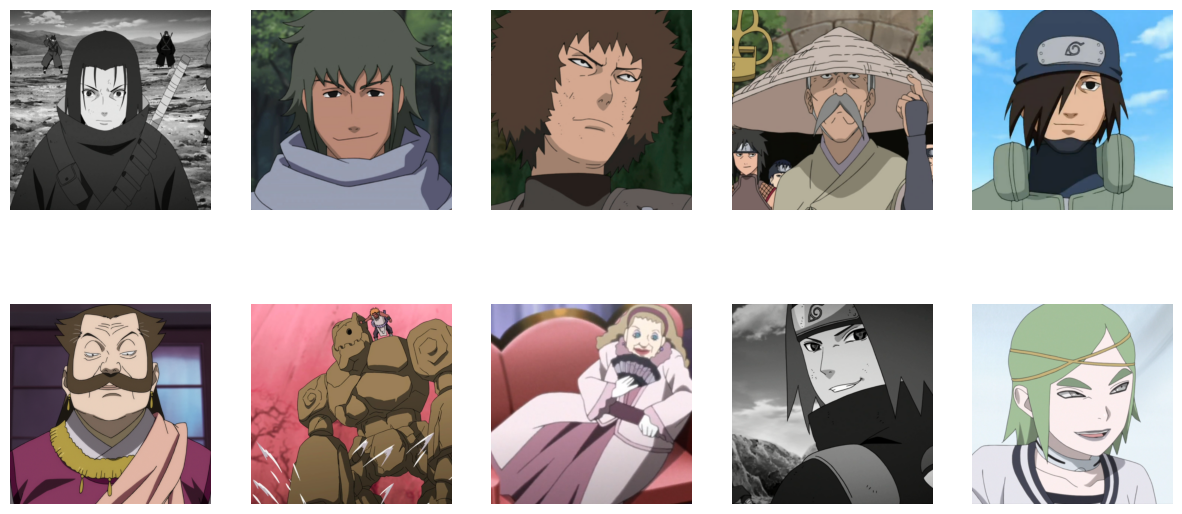

In [9]:
def hf_dataset_display_random_images(dateset_name: str, num_images: int = 10, split: str = "train"):
    dataset = datasets.load_dataset(dateset_name, split=split)
    random_indices = random.sample(range(len(dataset)), num_images)
    selected_images = [dataset[i]["image"] for i in random_indices]
    plt.figure(figsize=(15, 7))
    assert num_images <= 10, "num_images must be <= 10"
    for i, image in enumerate(selected_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(image)
        plt.axis('off')

hf_dataset_display_random_images("lambdalabs/naruto-blip-captions")

In [10]:
# https://github.com/huggingface/diffusers/blob/main/examples/text_to_image/train_text_to_image_lora.py
!accelerate launch --mixed_precision="fp16"  train_text_to_image_lora.py \
    --pretrained_model_name_or_path=${MODEL_NAME} \
    --dataset_name=${DATASET_NAME} \
    --dataloader_num_workers=8 \
    --resolution=512 \
    --center_crop \
    --random_flip \
    --mixed_precision "fp16" \
    --train_batch_size=8 \
    --gradient_accumulation_steps=4 \
    --learning_rate=2e-04 \
    --max_grad_norm=1 \
    --lr_scheduler="cosine" \
    --lr_warmup_steps=0 \
    --output_dir=${OUTPUT_DIR} \
    --push_to_hub \
    --hub_model_id=${HUB_MODEL_ID} \
    --num_train_epochs=9 \
    --validation_epochs=3 \
    --checkpointing_steps=500 \
    --validation_prompt="A naruto with blue eyes." \
    --seed=42

2025-02-15 09:16:51.957025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739611011.978145    2562 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739611011.984307    2562 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
02/15/2025 09:16:55 - INFO - __main__ - Distributed environment: DistributedType.NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

scheduler%2Fscheduler_config.json: 100% 308/308 [00:00<00:00, 2.07MB/s]
{'prediction_type', 'clip_sample_range', 'sample_max_value', 'variance_type', 'dynamic_thresholding_ratio', 'thresholding', 'timestep_spacing', 'rescale_betas_zero_snr'} was not foun

# Evaluation and scoring

In [11]:
# TODO

# Interactive testing

In [12]:
pipeline_original = AutoPipelineForText2Image.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")

pipeline_learned = AutoPipelineForText2Image.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline_learned.load_lora_weights(os.getenv("OUTPUT_DIR"), weight_name="pytorch_lora_weights.safetensors")

pipeline_unlearned = AutoPipelineForText2Image.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline_unlearned.load_lora_weights(os.getenv("OUTPUT_DIR"), weight_name="pytorch_lora_weights.safetensors")
total: int = 0
sum_before_invert: float = sum([float(param.sum()) for name, param in pipeline_unlearned.unet.named_parameters() if "lora_A" in name])
for name, param in pipeline_unlearned.unet.named_parameters():
    if "lora_A" in name:
        print(f"Inverting param {name}")
        param.data = -1 * param.data
        total += 1
assert sum_before_invert == -sum([float(param.sum()) for name, param in pipeline_unlearned.unet.named_parameters() if "lora_A" in name])
assert total > 0
print(f"Inverted {total} params")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Inverting param down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_out.0.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.0.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_q.lora_A.default_0.weight
Inverting param down_blocks.0.attentions.1.transformer_blocks.0.attn1.to_k.lora_A.default_0.weight
In

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

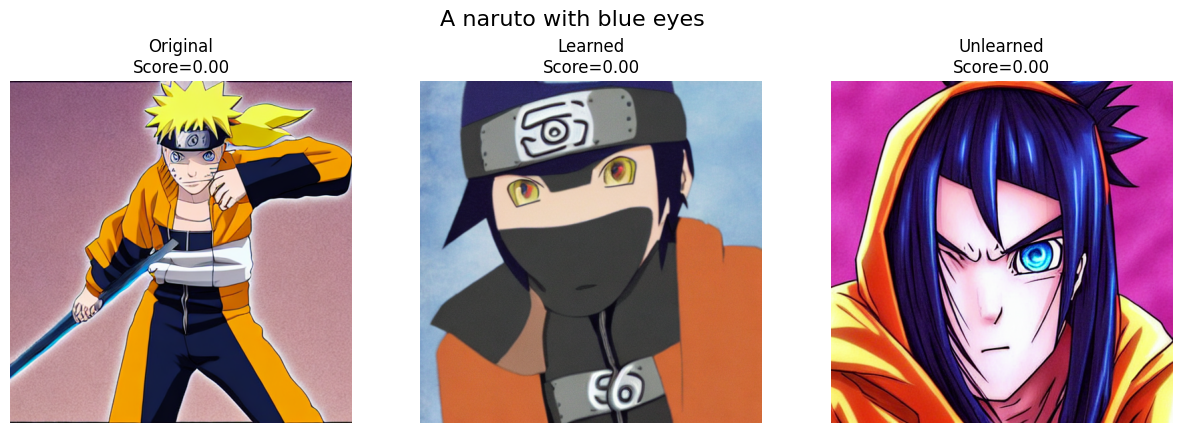

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
prompts = [
    "A naruto with blue eyes",
    "a man with dark hair and brown eyes",
    "a man in a blue shirt and headband",
    "a man with a white hat and a red cross on his head",
    "a man in armor standing in front of a blue background",
    "a young man in a green hoodie, cartoon style",
    "a young man in a green hoodie, narute style",
    "a naruto character in a green hoodie",
    "a woman in a suit and tie standing in front of a building",
    "an anime character in a white suit with a purple face",
]

scores_original: List[float] = []
scores_learned: List[float] = []
scores_unlearned: List[float] = []
for prompt in prompts*2:
    image_original = pipeline_original(prompt).images[0]
    image_learned = pipeline_learned(prompt).images[0]
    image_unlearned = pipeline_unlearned(prompt).images[0]

    # TODO: somehow evaluate the "naruteness" of the image
    score_original = 0.0
    score_learned = 0.0
    score_unlearned = 0.0
    scores_original.append(score_original)
    scores_learned.append(score_learned)
    scores_unlearned.append(score_unlearned)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image_original)
    axes[0].set_title(f"Original\nScore={score_original:.2f}")
    axes[0].axis("off")
    axes[1].imshow(image_learned)
    axes[1].set_title(f"Learned\nScore={score_learned:.2f}")
    axes[1].axis("off")
    axes[2].imshow(image_unlearned)
    axes[2].set_title(f"Unlearned\nScore={score_unlearned:.2f}")
    axes[2].axis("off")
    fig.suptitle(prompt, fontsize=16)
    plt.show()

print(f"Original score: {np.mean(scores_original)} +- {np.std(scores_original)}")
print(f"Learned score: {np.mean(scores_learned)} +- {np.std(scores_learned)}")
print(f"Unlearned score: {np.mean(scores_unlearned)} +- {np.std(scores_unlearned)}")